# Introduction to scientific python: numpy and matplotlib

After a few weeks at learning programming, you may have noticed already that computers are quite good at manipulating numbers. The python language is helping us at it, by providing an interface between us and "the machine". However, we are going to see that the language needs a little bit of "extra help" to become truly useful for us scientists.

This help comes with the scientific python ecosystem: in the front line, [numpy](https://numpy.org) and [matplotlib](https://matplotlib.org/)!

**I strongly recommend to download this notebook, run the examples yourself and play with it on your computer as you go through this unit** (see the [explanation video](02-jupyter-dos)).

*Copyright note: many parts of this lesson are taken from the excellent [numpy for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html) tutorial.*

##  NumPy

### Why NumPy?

NumPy (**Numerical Python**) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development.

The NumPy library contains multidimensional array and matrix data structures (you’ll find more information about this in later sections). It provides `ndarray`, a homogeneous n-dimensional array object, with methods to efficiently operate on it.

**But why do we need arrays?**

You remember the following behavior from python lists:

In [1]:
[1, 2] + [1, 2]

[1, 2, 1, 2]

This behavior is useful in certain situations, but most of the time, scientists actually want to realize operations (addition, division, multiplication) **element-wise**, i.e. element per element. In a nutshell, scientists need the following behavior:

In [2]:
def elementwise_addition(left, right):
    """A pale copy of numpy's addition. Don't do this at home!"""
    output = []
    for l, r in zip(left, right):
        output.append(l + r)
    return output

elementwise_addition([1, 2], [1, 2])

[2, 4]

While it would be possible to use python to redefine all operations on lists in a similar way, it would turn out to be highly inefficient. For reasons which will be explained later, Python is actually quite slow at looping over lists and numbers like this. 

This is why NumPy was created. **NumPy arrays are faster and more compact than Python lists**. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.
NumPy **efficient calculations** with arrays and matrices and it supplies an enormous library of **high-level mathematical functions** that operate on them.

### Installing NumPy

Make sure you have followed [my instructions](01-install-packages) before going on.

### How to import NumPy

To access NumPy and its functions import it in your Python code like this:

In [3]:
import numpy as np

We shorten the imported name to `np` for better readability of code using NumPy. This is a widely adopted convention that you should follow so that anyone working with your code can easily understand it.

### What is an array?

An array is a central data structure of the NumPy library. An array is a grid of values: **the elements in an array are all of the same type**, referred to as the array `dtype`.

There are many ways to create an array, and one of the simplest is by converting a Python list to a NumPy array:

In [4]:
a = np.array([1, 2, 3, 4, 5, 6])

In [5]:
a

array([1, 2, 3, 4, 5, 6])

An array has **attributes** describing it and helping us to understand its content. Let's explore some of them:

In [6]:
# How many elements does the array have
a.size

6

In [7]:
# What kind of elements does the array have
a.dtype

dtype('int64')

In [8]:
# How many dimensions does the array have
a.ndim

1

In [9]:
# And what is its shape
a.shape

(6,)

All these attributes may sound a bit obscure still. Let's have a look at another example: 

In [10]:
a = np.array([[1.3, 2, 3.7, 4], [5, 6.1, 7, 8.5], [9, 10.9, 11, 12.8]])
a

array([[ 1.3,  2. ,  3.7,  4. ],
       [ 5. ,  6.1,  7. ,  8.5],
       [ 9. , 10.9, 11. , 12.8]])

In this example, `a` is a multidimensional array of two dimensions. Let's have a look at its attributes:

In [11]:
f"size: {a.size}; dtype: {a.dtype}; ndim: {a.ndim}; shape: {a.shape}"

'size: 12; dtype: float64; ndim: 2; shape: (3, 4)'

The **size** of this array is 12 ("3 rows" times "4 columns"), its **dtype** (datatype) is float (the `64` in the name indicates the number of bits - we'll come back to this point later). The array has 2 **dimensions**, and its **shape** is (3, 4), which stands for 3 rows and 4 columns.

You might occasionally hear an array referred to as a "`ndarray`" which is shorthand for "N-dimensional array". An N-dimensional array is simply an array with any number of dimensions. You might also hear 1-D, or one-dimensional array, 2-D, or two-dimensional array, and so on. The NumPy `ndarray` is used to represent both matrices and vectors. A **vector** is an array with a single dimension (there’s no difference between row and column vectors), while a **matrix** refers to an array with two dimensions. For 3-D or higher dimensional arrays, the term **tensor** is also commonly used.

**For this week's class, we will stick with vectors (1-D arrays).**

### Creating arrays 

Besides creating an array from a sequence of elements (e.g. with a list as done above), you can easily create an array filled with 0’s:

In [12]:
np.zeros(3)

array([0., 0., 0.])

Or with ones:

In [13]:
np.ones(2)

array([1., 1.])

You can create an array with a range of elements:

In [14]:
np.arange(4)

array([0, 1, 2, 3])

And even an array that contains a range of evenly spaced intervals. To do this, you will specify the first number, last number, and the step size:

In [15]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

You can also use `np.linspace()` to create an array with values that are spaced linearly in a specified interval:

In [16]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

While the default data type is floating point (`np.float64`), you can explicitly specify which data type you want using the `dtype` keyword:

In [17]:
np.ones(2, dtype=np.int64)

array([1, 1])

### Indexing and slicing

You can index and slice NumPy arrays in the same ways you can slice Python lists.

In [18]:
data = np.array([1, 2, 3])
data[1]

np.int64(2)

In [19]:
data[0:2]

array([1, 2])

In [20]:
data[1:]

array([2, 3])

In [21]:
data[-2:]

array([2, 3])

You can visualize it this way:

![npimg](https://numpy.org/doc/stable/_images/np_indexing.png)

This is useful to select part of your data to use in further analysis or additional operations (**subset** or **slice**).

Slicing is useful when you know the structure of the data well (e.g. take the last X elements of an array). Sometimes, you may want to select data based on a condition (e.g. "pick data larger than X"). Fortunately, it's straightforward with NumPy.

For example, if you start with this array: 

In [22]:
a = np.arange(1, 15)
np.random.shuffle(a)  # Shuffle the elements for more fun
a

array([11,  5,  8,  3,  7, 13, 14, 12, 10,  4,  2,  9,  6,  1])

You can easily select all of the values in the array that are less or equal 5:

In [23]:
b = a[a <= 5]
b

array([5, 3, 4, 2, 1])

What did we just do here? Maybe its useful for you to repeat the order in which operations are realized by the interpreter:
- we have an assignment operator (the `=`), so we know that the right hand side is evaluated first.
- on the right hand side, the operations within the brackets `[]` are evaluated first - we'll get back to this
- the output of the operation `a <= 5` is then used to **index** (access) the elements in `a`
- the output of this last step is then assigned to the variable b

Is this clear? If not, the following might help a little bit further:

In [24]:
le_five = a <= 5
le_five

array([False,  True, False,  True, False, False, False, False, False,
        True,  True, False, False,  True])

**Exercise: what it the size, shape, and dtype of `le_five`? Can you explain why?**

`le_five` can then be used to index the array `a`:

In [25]:
a[le_five]

array([5, 3, 4, 2, 1])

And this is then assigned to the variable b with:

In [26]:
b = a[le_five]
b

array([5, 3, 4, 2, 1])

That's it!

Now, what do you think of the following code:

In [27]:
c = a[(a > 2) & (a < 11)]
c

array([ 5,  8,  3,  7, 10,  4,  9,  6])

That's great, right?

**Important! You can specify multiple conditions with the logical operators `&` (`and`) and `|` (`or`). In numpy however you HAVE to use `&` and `|` although they mean the same as `and` and `or` for python.** Consider the following:

In [28]:
print(True | False, True or False)  # These two are equivalent with boolean scalars
print((a > 2) & (a < 11), (a > 2) and (a < 11))  # On numpy arrays, the second one will raise an error

True True


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Basic array operations

NumPy is very good at doing math! 

For example, you can add two arrays together with the plus sign.

In [29]:
data = np.array([1, 2])
ones = np.ones(2, dtype=int)
data + ones

array([2, 3])

![img](https://numpy.org/doc/stable/_images/np_data_plus_ones.png)

You can, of course, do more than just addition!

In [30]:
print(data - ones)
print(data * data)
print(data / data)
print(data ** data)

[0 1]
[1 4]
[1. 1.]
[1 4]


There are times when you might want to carry out an operation between an array and a single number (also called an operation between a **vector** and a **scalar**) or between arrays of two different sizes. For example, your array (we'll call it "data") might contain information about distance in miles but you want to convert the information to kilometers. You can perform this operation with:

In [31]:
data = np.array([1.0, 2.0])
data * 1.6

array([1.6, 3.2])

![img](https://numpy.org/doc/stable/_images/np_multiply_broadcasting.png)

NumPy understands that the multiplication should happen with each cell. That concept is called broadcasting. Broadcasting is a mechanism that allows NumPy to perform operations on arrays of different shapes (we'll learn about this in a later lecture).

### More useful array operations

NumPy also performs aggregation functions. In addition to `min`, `max`, and `sum`, you can easily run `mean` to get the average, `prod` to get the result of multiplying the elements together, `std` to get the standard deviation, and more:

In [32]:
data = np.array([1.0, 2.0, 3.0])
print(data.max())
print(data.min())
print(data.sum())

3.0
1.0
6.0


![img](https://numpy.org/doc/stable/_images/np_aggregation.png)

### Mathematical operations 

NumPy also comes with a very (very) large amount of [mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html) that operate on arrays. Here are two examples of them:

In [33]:
a = np.array([0, np.pi / 2])
a

array([0.        , 1.57079633])

In [34]:
np.sin(a)

array([0., 1.])

In [35]:
np.round(a)

array([0., 2.])

NumPy's functions apply to all elements of an array, just like all other operations: **element-wise**.

## Matplotlib

### Why matplotlib?

Matplotlib is a comprehensive library for creating plots and graphics in python. It is used in combination with NumPy in many (many) scientific applications.

### Installing matplotlib

Make sure you have followed [my instructions](01-install-packages) before going on.

### How to import matplotlib

For now, you will import the matlotlib tools we need like this:

In [36]:
import matplotlib.pyplot as plt

This command is only importing a subset of all matplotlib functions, but it is the most commonly used (by far).

**Matplotlib is best learned by doing**. Today I'll showcase some of the tools you'll need for the assignments, and with time you'll learn to use many more!

### A first plot 

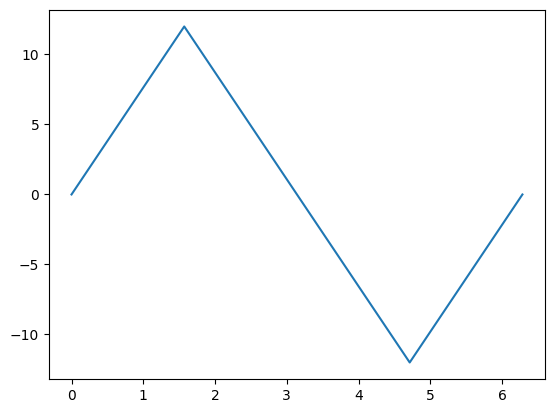

In [37]:
# This you should know by now what it does - if not, check it out above
x = np.linspace(0, 2 * np.pi, 5)
y = np.sin(x) * 12

# This is new
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Let's repeat this example, but with inline comments and adding some elements to the plot:

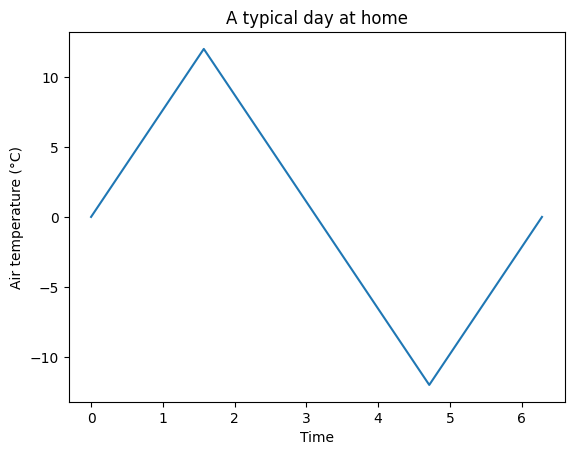

In [38]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y)  # Plot some data on the axes.
ax.set_xlabel('Time')  # Add a label to the x-axis
ax.set_ylabel('Air temperature (°C)')  # Add a label to the y-axis
ax.set_title('A typical day at home')  # Add a title to the plot
plt.show()  # show the figure on screen. This is optional in Jupyter Notebooks but mandatory in scripts

**Exercise: write a simple python script (not a notebook) reproducing the plot above. Run the code with and without `plt.show()` at the end.**

### Line plots 

Line plots are probably the most common way to represent data.

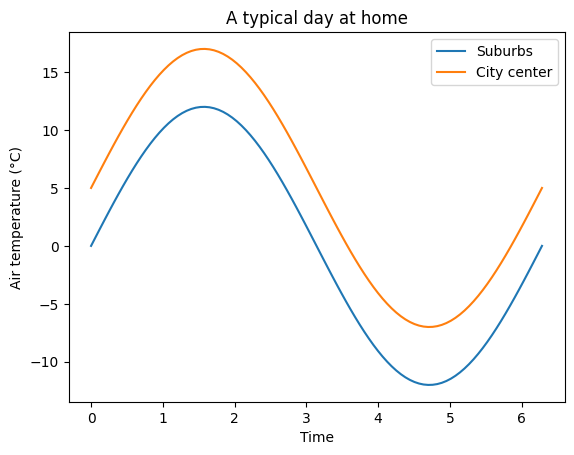

In [39]:
# Create some data
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x) * 12
y2 = y1 + 5

# Plot it
fig, ax = plt.subplots()
ax.plot(x, y1, label='Suburbs')
ax.plot(x, y2, label='City center')
ax.legend()  # Draw the legend from line labels
ax.set_xlabel('Time')
ax.set_ylabel('Air temperature (°C)')
ax.set_title('A typical day at home');

### Scatter plots

Scatter plots are used when it does not make sense to connect the data points together with lines. This happens when there is no temporal or spatial relationship between the data points, when the data is noisy or has discontinuities (for example wind direction). 

Scatter plots are often used in statistics, to represent relationships between data. Here for example:

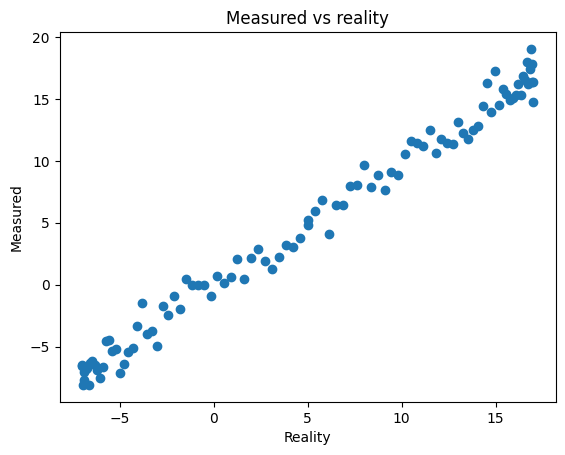

In [40]:
# Create random data
y3 = y2 + np.random.randn(y2.size)

# Make a scatter plot
fig, ax = plt.subplots()
ax.scatter(y2, y3)
ax.set_xlabel('Reality')
ax.set_ylabel('Measured')
ax.set_title('Measured vs reality');

### Styling plots

You can change the style of practically *everything* in a plot. For now, we will focus on the most important things: figure size, lines and markers.

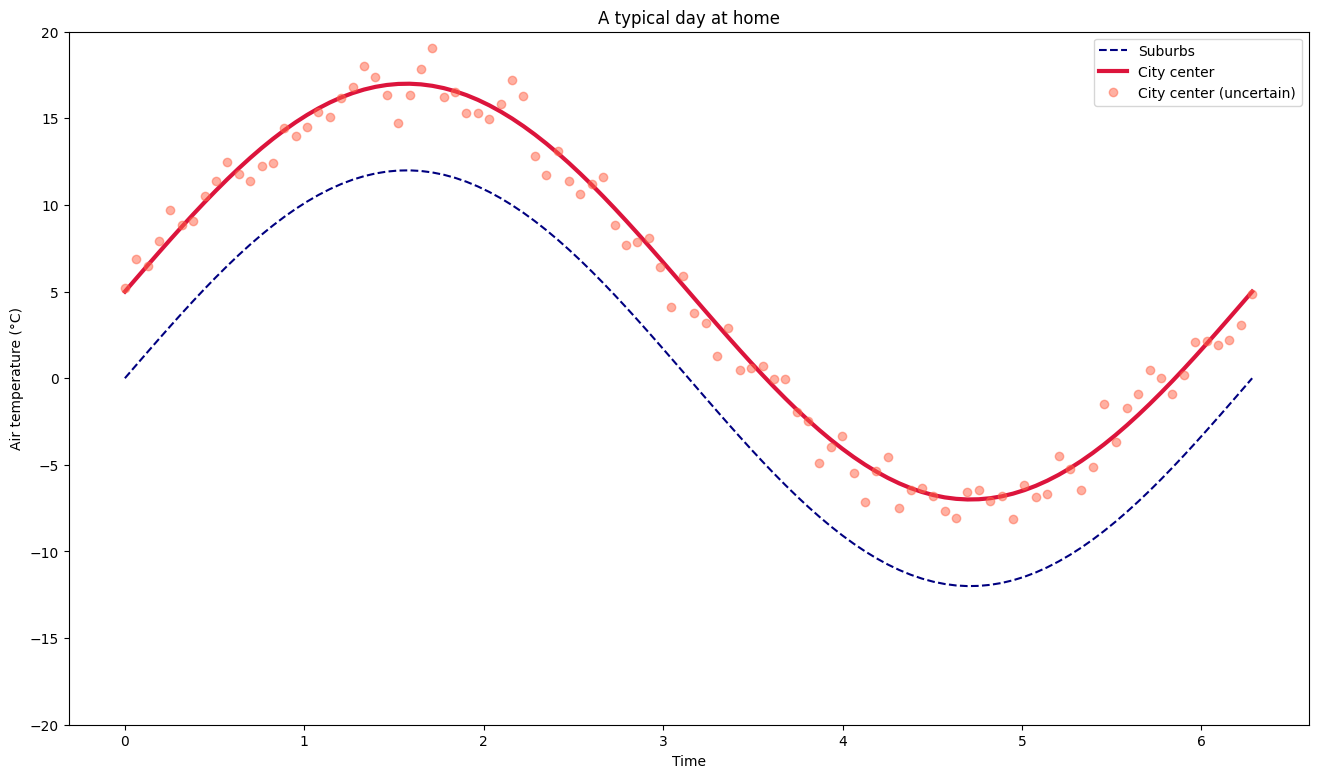

In [41]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x, y1, color='navy', linestyle='--', label='Suburbs')
ax.plot(x, y2, color='crimson', linewidth=3, label='City center')
ax.plot(x, y3, marker='o', linestyle='none', color='tomato', alpha=0.5, label='City center (uncertain)')
ax.legend()
ax.set_ylim(-20, 20)
ax.set_xlabel('Time')
ax.set_ylabel('Air temperature (°C)')
ax.set_title('A typical day at home');

- **Figure size** can be set when the figure is created.
- **Lines** can be styled as "solid" (or `-`), "dotted" (or `..`), "dashed" (or `--`), "dashdot" (or `-.`). [More options](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) are available for the adventurous. Their width can be changed with the `linewidth` keyword (accepting a float). 
- **Markers** can be added to line plots (`marker=...`). Their are many different ones ([here](https://matplotlib.org/stable/api/markers_api.html) is a list). In the example above, I also chose to plot only markers, no line (`linestyle='none'`)
- **Colors** can be set in many different ways, the most common is to use [named matplotlib colors](https://matplotlib.org/3.5.0/gallery/color/named_colors.html)
- **Transparency** can be set with the `alpha=` keyword.
- **Axis ranges** can be set with `ax.set_ylim()` (or `ax.set_xlim()` for the x axis)

The line and marker styles are then automatically applied to the legend as well.

**Exercise: play around with the many options available and make experiments!**

### Plotting data of different units 

Sometimes, you want to plot data with very different values on the same figure. For example, plotting data of different order of magnitudes or of different units:

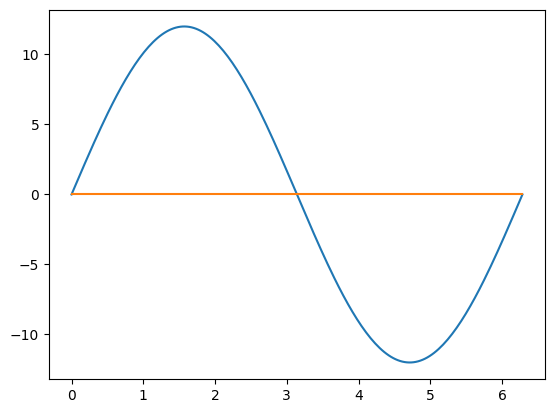

In [42]:
# Create some data
x = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x) * 12
y2 = np.cos(x) * 0.0001  # Very different scale

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2);

The problem is that the orange line has variations which are not visible in the graph. There are two simple solutions to this problem, explained below.

#### Two subplots on the same figure 

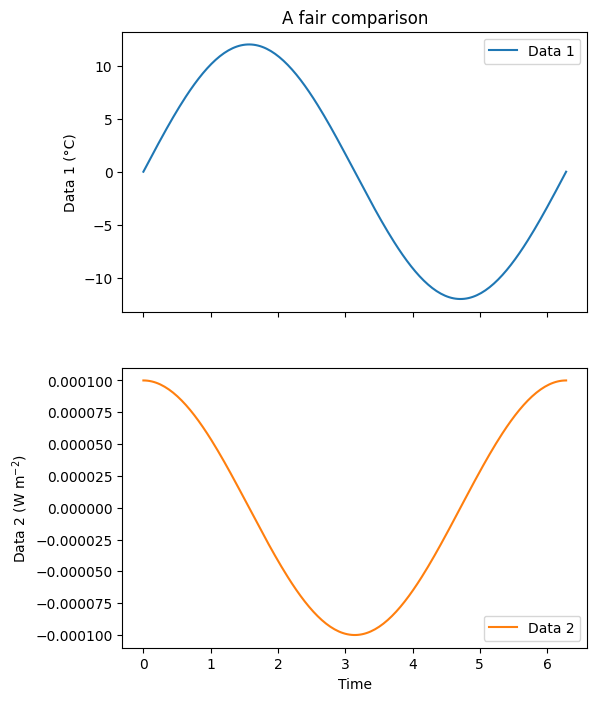

In [43]:
# Subplots: 2 rows one column, they share the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Plot on the first axis as usual
ax1.plot(x, y1, label='Data 1')

# Plot on the second axis
ax2.plot(x, y2, color='C1', label='Data 2');

# Add the legend for both axis
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Labels and titles
ax1.set_ylabel('Data 1 (°C)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Data 2 (W m$^{-2}$)')
ax1.set_title('A fair comparison');

#### Two y-axis on the same plot

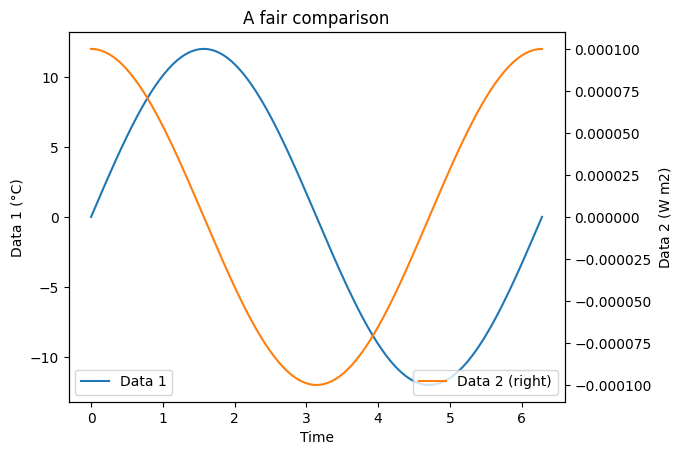

In [44]:
fig, ax = plt.subplots()

# Plot on the first axis as usual
ax.plot(x, y1, label='Data 1')

# Add a twin axis to the right and plot on it
axr = ax.twinx()
axr.plot(x, y2, color='C1', label='Data 2 (right)');

# Add the legend for both axis
ax.legend(loc='lower left')
axr.legend(loc='lower right')

# Labels and titles
ax.set_xlabel('Time')
ax.set_ylabel('Data 1 (°C)')
axr.set_ylabel('Data 2 (W m${2}$)')
ax.set_title('A fair comparison');

### Storing the plot as png or pdf for later

If you are happy with a plot and want to store it on your computer for later use (in a report or a manuscript), use `fig.savefig`:

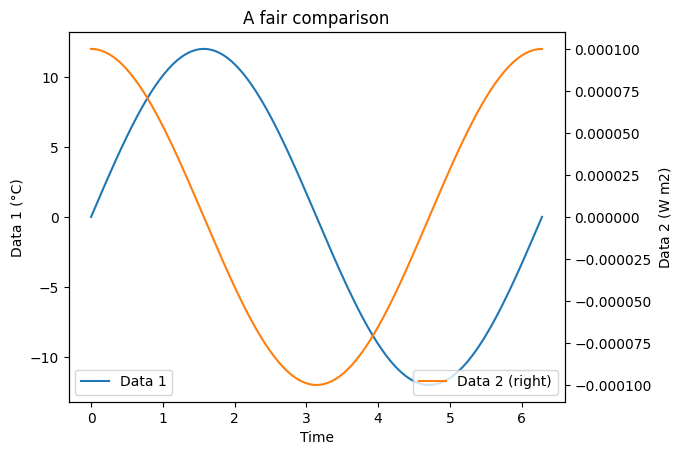

In [45]:
fig, ax = plt.subplots()

# Plot on the first axis as usual
ax.plot(x, y1, label='Data 1')

# Add a twin axis to the right and plot on it
axr = ax.twinx()
axr.plot(x, y2, color='C1', label='Data 2 (right)');

# Add the legend for both axis
ax.legend(loc='lower left')
axr.legend(loc='lower right')

# Labels and titles
ax.set_xlabel('Time')
ax.set_ylabel('Data 1 (°C)')
axr.set_ylabel('Data 2 (W m${2}$)')
ax.set_title('A fair comparison');

# Save the figure
fig.savefig('myfigure.png', dpi=150, bbox_inches='tight')

[figure.savefig](https://matplotlib.org/3.5.0/api/figure_api.html?highlight=savefig#matplotlib.figure.Figure.savefig) has several options available. The first position argument `fname` indicates the path to the file to write (default is is the current working folder) and its format (e.g. `.png`, `.pdf` or `.eps`). The other two arguments are setting the resolution the final image and whether to have margins around the figure (I often use `bbox_inches='tight'`).

## Learning checklist 

<label><input type="checkbox" id="week05_01" class="box"> I downloaded this notebook from the website and ran all the examples myself.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I understand the main differences between numpy arrays and python lists.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I can create numpy arrays and realise basic operations on them (computations, aggregations...).</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I can generate line plots and scatter plots of data stored in numpy arrays.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I can customise my plot by using different colors and line styles and add a legend to it.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I can store a plot for later use.</input></label><br>

## To go further

The [Basic usage](https://matplotlib.org/stable/tutorials/introductory/usage.html) documentation page is a good place to start if you are curious to learn more